# what is the defference between supervised/unsupervised learning?

supervised learning:

learning a function that takes input data and produces outputs where the learning single comes from a set of labelled data points (usually labelled by humans). example: regression, neural nets.

unsupervised learning:

learning a function that takes input data and produces outputs where the learning singal comes from inherent structure n the data itself; usually there are no labels in this type of learning.  example: k-means, reinforcement learning.

# optimization

**description**

optimization is the practice of finding a solution which maximizes or minimizes some metric. for example you might choose to minimize a loss function of your model or algorithm. optimization is at the core of machine learning and in a sense it is the mechanism by which the machines learn.

**math:**

often the first type of optimization taught for machine learning is the gradient descent algorithm. below is a graphical represtenation of gradient descent:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/512px-Gradient_descent.svg.png"/>

Imagine that the center is a whirlpool or a black hole and we are obsreving it from above, each ring gets steeper as we get closer to the center. your job is to try to ride down into the abyss. 

**example:**

The way gradient descent works is by creating a cost map (in 2, 3, or N dimensions). You create a function that measures your 'cost' as a function of your parameters: $f_c = f_{w1} + f_{w2} + f_{w3} ...$ Then if you change your parameters in this function ($w_1, etc$) the cost would change. After making this function you calculate a 'gradient' for each parameter $w_n$ each gradient the slope (a single number value) of a straight line that tells you how changing that parameter from its current value would affect the cost output by the function. We then always subtract the value of this gradient from the parameter; we go down the slope of the gradient; that is why this method is called gradient descent. Here is an example: 

<img src="https://i.stack.imgur.com/xJgdz.png"/>

Imagine this curve is our cost function with cost on the vertical y axis and our parameter value $w_1$ on the horizonal x axis. You can see that as we adjust our parameter the cost goes up or down. We want to get to the bottom of this function, the lowest point. 

**Let's think of all the cenarios if we start at point E:**

given gradient is -G

adding the gradient:

$E + -G = E - G = F$ (a higher cost value, this is bad)

subtracting the gradient:

$E - -G = E + G = D$ (optimal point, this is good)

**Now let's do the same but assuming we start at point C:**

given gradient is G

adding the gradient:

$C + G = D$ (a higher cost value, bad)

subtracting the gradient:

$C - G = D$ (optimal point, good)

So adding the gradient gives a higher cost value, subtracting it gives a lower one. So we should always subtract our gradient form the current prameter value.

Extra context:

The gradient for a particular parameter $w_1$ com|es from the derivative of your cost function relative to $w_1$ yand we don't really want to get into that. If you ar familiar with calculus the gradient is the slope of the derivative \ trangent line at the point where your parameter currently sits on the cost function.

other sources:

https://en.wikipedia.org/wiki/Mathematical_optimization

# learning rates

**description**

a learning rate is the rate at which we accumulate new information into our model. 

**math**

if we have a gradient $G$ we just multiply it by some learning rate $l$.

$E = 5$: our parameter value

$G = -1.25$: our gradient

$l = 0.01$: our learning rate

$E - G*l = 5 - 0.0125 =  4.9875$

This learning rate has moved us along the directon of the gradient but only for a small step.

**example**

You may have noticed above that if we move our parameter too much along the gradient/slope from its current point the value no longer matches our actual cost function. The gradient is only a good estimate of the cost function for very small moves. You can see this below where the straight line function starts to diverge from the actual cost function.

<img src="https://i.stack.imgur.com/xJgdz.png"/>

To deal with this problem we only take a small step along the gradient, we multiply the gradient by some small value (0.01) to reduce the effect of moving along it. This small value is our 'learning rate' sometimes also referred to as a step size.

other resources:

https://datascience.stackexchange.com/questions/410/choosing-a-learning-rate

# regression

**description**

regression is a technique that predicts come output vlaue for a set of inputs. it usually takes some input variables and outputs a continuous value.  i

**math**

the morst basic form of linera regression takes the form $y = b + w_1x_1 + w_2x_2 ...$ where the x variables are the inputs, w are the weights/coefficients for those inputs. and b is a constant term that cna shift the regression up or down along the y axis to get it to fit the data better.

**example**

predicting height from age, gender, and ethnicity. let's solve a regression problem with gradient descent in numpy; see the cell below. The cars dataset is a univariate dataset that measures the stopping distance of the cars with the speed of the cars at the time of craking as an input. Fun fact: these cars are from the 1920s!

animation guide:
https://matplotlib.org/examples/animation/simple_anim.html

gradient descent: 
https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

data:
https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/cars.html

The bulk of the gradient descent algorithm for linear regression is in this method, the gradient descent is animated below:

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# set ffmpeg path to installed path (for anmation)
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'    

# load the data 
data = pd.read_csv('cars.csv')

m = np.random.normal(loc=10, scale=4, size=1)
b = np.random.normal(loc=1, scale=1, size=1) 
x_data = data['speed']
y_data = data['dist']

def init():
    # start a random line
    line.set_data([], [])
    return (line,) 

# create a graph
fig, ax = plt.subplots()
ax.set_xlim((0,30))
ax.set_ylim((0,130))
_ = ax.scatter(data['speed'], data['dist'])
line, = ax.plot([], [], lw=2)

In [ ]:
# performs the gradient descent 
# stroing the resulting model at
# each gradient descent step
def calc_regressions(m, b):
    ys = []
    # run 10 iterations of gradient
    # descent
    for i in range(10):
        # create predictions for this
        # m and this b (our parameters)
        y_pred = m * data['speed'] + b
        # calculate the gradients for those parameters
        m_gradient = 2*np.mean(-x_data*(y_data-y_pred))
        b_gradient = 2*np.mean(-(y_data-y_pred))
        # update our parameters with the gradients
        m = m - (m_gradient*0.001)
        b = b - (b_gradient*0.001)
        # store this iteration of gradient descent
        x = np.linspace(0,30)
        ys.append(m * x + b)
    return ys

In [14]:
ax.set_title('random reegression lines (random w,b values)')

def animate_rand(i):
    m = np.random.normal(loc=10, scale=4, size=1)
    b = np.random.normal(loc=1, scale=1, size=1) 
    x = np.linspace(0,30)
    y = m * x + b
    line.set_data(x, y)
    return (line,)   

# call the animator for a random line
anim = animation.FuncAnimation(fig, 
                               animate_rand, 
                               init_func=init,
                               frames=10,
                               blit=True)
rc('animation', html='html5')
anim

In [15]:
ax.set_title('gradient descent regression values')

ys = calc_regressions(m, b)

# use gradient descent to fit a regression
def animate_fit(i):
    line.set_data(np.linspace(0,30), ys[i])
    return (line,)

# call the animator for our fitted line
anim = animation.FuncAnimation(fig, 
                               animate_fit, 
                               init_func=init,
                               frames=10,
                               blit=True)
rc('animation', html='html5')
anim

# classification

**description**

classification is a technique used for predicting what type of thing an input is. usually this involves having some number of classes (dog or cat for example) and picking one for some input or set of inputs.

**math**

the simplest form of classification is logistic regression. it is a process to separate two sets of datapoints into two different groups.

**example**

drawing a boundary line for men/women based on height. In the cell blew we perform a logistic regresson. Here we will use sklearn but if you want to see a loss function/gradient descent like the normal linear regression we did above you can see the second resource below.

resources:

https://www.kunxi.org/notes/machine_learning/logistic_regression/

https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/

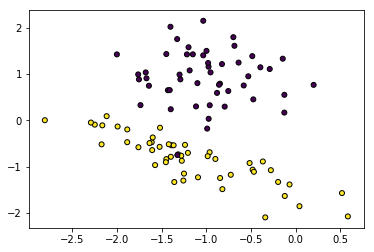

In [147]:
# generate a datasets with 2 classes
from sklearn.datasets import make_classification
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

In [148]:
# run a logistic regression on it
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

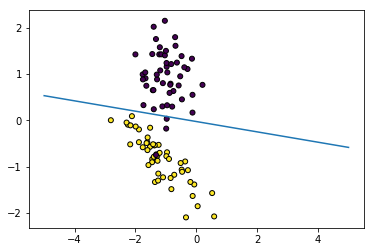

In [160]:
# visualze decision boundary for classes
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, s=25, edgecolor='k')
x1 = np.linspace(-3, 1)
ydb = -((lg.coef_[0][0] * x1) + lg.intercept_[0])/lg.coef_[0][1]
plt.plot(xdb, ydb)
plt.show()

# regularization

**description**

regularization is a technique used to manage 'high variance' models. you model can be too flexible and overfit the dataset. for example a model that runs through every single point will probably be bad at predicting new points. to smooth out your model you can use regularization to make it fit less closely to the original dataset. models that have been smoothed/regularized tend to predict new data with a lower error than overfitted models.

**math**

regularization is the pracitce of penalizing your model for using too many parameters or a few prameters too heavily. You do this by adding some function of your parameters to your l
oss function. Below I've added two types of regularization to a sum of squared errors loss function.

regression model:

$y = b + w_1x_1 + w_2x_2 ...$

L1 Regularization (aka lasso regression): 

$e = 1/n*\sum(y_i-y_t)^2 + \lambda\sum| w_i | $

lasso regression shrinks small parameters to 0, thus getting rid of them entirely.

L2 Regularization (aka ridge regression):

$e = 1/n*\sum(y_i-y_t)^2 + \lambda\sum{w_i^2} $

lasso regression (L1) 

lambda is a hyperparameter that tells the regression 'how much' regularization you want. IF you set it to 0 you get no regularization, all other prositive values increase regularization.

**example**

To regularize linear regeression we can use something called a ridge regression. Ridge regression uses the L2 regularization to regularize our model and often performs better than lasso regression. We will use the R rock dataset which measures the permeability (perm) of petroleum rocks based on, area, perimeter (peri), ans shape of the rocks. This is a regression problem.

resources:

https://stats.stackexchange.com/questions/4272/when-to-use-regularization-methods-for-regression

https://medium.com/towards-data-science/l1-and-l2-regularization-methods-ce25e7fc831c

https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/rock.html

In [192]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, LinearRegression

# load the data 
data = pd.read_csv('petroleum_rocks.csv')

x_train, y_train = data[:40][['area','peri','shape']].values.reshape(-1,3), data[:40]['perm'].values.reshape(-1,1)
x_val, y_val = data[40:][['area','peri','shape']].values.reshape(-1,3), data[40:]['perm'].values.reshape(-1,1)

lin_reg = LinearRegression()
# here lambda is called alpha
ridge_reg =  Ridge(alpha=0.5)

lin_reg.fit(x_train, y_train), ridge_reg.fit(x_train, y_train)

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001))

In [204]:
# ridge regression (regularized)
ridge_mse = mean_squared_error(y_val, ridge_reg.predict(x_val))
# linear regression (not regularized)
lin_mse = mean_squared_error(y_val, lin_reg.predict(x_val))
(ridge_mse, lin_mse)

(251611.99474141741, 288385.03733854095)

ridge_mse: 251611.99 is lower than linear mse: 288385.03 on validation data.
as you can see on the validation data the ridge regression does better. it is regularized and overfits the data less.

# feature selection

**description**

is the process of choosing some subset of features to use in your model and discarding others. some features may be redundant. having too many features can actually make your model worse or increase training time so they need to be removed.

**math:**

**example:**

other sources:

https://en.wikipedia.org/wiki/Feature_selection

# feature engineering

**description**

is a process of turning your raw data into a structure that a machine learning algorithm can learn or or process (or do those things more easily). some algorithms, like a neural net, are themselves a form of feature engineering (the neurons being latent features). feature engineering can include the construction of new features or the transformation of existing features (whitening/normalization).

**math:**

**example:**

other sources:

https://en.wikipedia.org/wiki/Feature_engineering

# model selection/evaluation

**description**

a process of choosing the best model among several candidates. often such experiments revolve around determining whether more complex models perform better and exploring this tradeoff for the problem you are trying to solve. often to choose a model models are tested and evaluated on a set of data for which the labels are knonw (a test set). the evaluatio metric is an art unto itself; usually the simpler (single number) the better.

**math:**

**example:**

other sources:

https://en.wikipedia.org/wiki/Model_selection

http://scikit-learn.org/stable/modules/model_evaluation.html

# curse of dimensionality

**description**

dimensionality adds information in terms of dimesions but incraeses the 'space' inside the dataset exponentially. your data ends up being sparse; sparse data is very difficult for many ml models to find patterns in. so the curse is that as your data gets new dimensions along which more information can exist, many rows will lack that dimension and so increase the sparsity of yoru dataset.

**math:**

**example:**

other sources:

https://en.wikipedia.org/wiki/Curse_of_dimensionality

# dimensionality reduction

**description**

this is the process of reducing the number of inputs your model sees usually to make it easier to find a pattern. feature selection and extraction are both parts of dimensionalit reduction.

**math:**

PCA

**example:**

other sources:

https://en.wikipedia.org/wiki/Dimensionality_reduction

# cluster analysis

**description**

this is a technique that is similar to classification algorithms. it groups similar data points together and can be used to select features, or to understand more relationships about your dataset that may not appear on the surface.

**math:**



**example:**

k means

other sources:

https://en.wikipedia.org/wiki/Cluster_analysis

# recommender systems

**description**

this is class of information filtering system that tries to predict what type of item a user might what or what kind of ranking/rating a user might give to a particular item.

**math:**

**example:**

other sources:

https://en.wikipedia.org/wiki/Recommender_system

# natural language processing

**description**

natural languge processing (nlp) is a set of tool and techniques to help computers parse, break down, and interpret natural human language. this topic encompasses models (generative and discriminative), tokenziation libraries, as well as vecotr math that can represent language mathematically in a latent space.

**math:**

**example:**